# Clustermaps

In [1]:
import reframed
import pandas as pd
import numpy as np

from sklearn.metrics.pairwise import pairwise_distances
import scipy.spatial as sp
import scipy.cluster.hierarchy as hc
import seaborn as sns

import os
import json
import matplotlib.pyplot as plt


import sys

sys.path.append("../functions/")

import colors_MAGs as color_functions
import general_functions as general_func
import clustermap_functions as clustermap_func

In [2]:
%load_ext autoreload
%autoreload 2

### Load data

**Load colormaps**

In [3]:
phyla_lut, unique_phyla, phylum_colors = color_functions.phylum_colors_func()
cazy_lut,unique_numbers,cazy_colors = color_functions.cazy_colors_func()
chebi_lut, chebi_interesting, chebi_colors_ser = color_functions.chebi_rxn_color_func()

### Load models

In [4]:
GEMs_dict = {}

directory = os.fsencode("../output/GEMs/GEMs_final/")

for file in os.listdir(directory):
    filename = os.fsdecode(file)
    print(filename)

    GEMs_dict[filename[:-4]]= reframed.load_cbmodel("../output/GEMs/GEMs_final/"+filename)


CH7-bin.18.xml
CH15-bin.7.xml
CH13-bin.0.xml
CH1-bin.4.xml
CH13-bin.1.xml
CH13-bin.11.xml
CH15-bin.6.xml
CH7-bin.2.xml
CH13-bin.13.xml
CH1-bin.10.xml
CH1-bin.6.xml
CH13-bin.2.xml
CH13-bin.12.xml
CH15-bin.5.xml
CH7-bin.1.xml
CH15-bin.1.xml
CH1-bin.3.xml
CH13-bin.17.xml
CH15-bin.0.xml
CH7-bin.4.xml
CH7-bin.23.xml
CH7-bin.6.xml
CH15-bin.22.xml
CH15-bin.2.xml
CH1-bin.1.xml
CH13-bin.4.xml
CH13-bin.14.xml
CH15-bin.23.xml
CH7-bin.20.xml
CH8-bin.8.xml
CH8-bin.9.xml
CH8-bin.25.xml
CH14-bin.4.xml
CH14-bin.1.xml
CH8-bin.21.xml
CH14-bin.2.xml
CH8-bin.22.xml
CH8-bin.2.xml
CH8-bin.29.xml
CH8-bin.7.xml
CH8-bin.6.xml
CH3-bin.2.xml
CH8-bin.14.xml
CH8-bin.16.xml
CH3-bin.0.xml
CH8-bin.5.xml
CH3-bin.1.xml
CH8-bin.17.xml
CH7-bin.11.xml
CH9-bin.1.xml
CH15-bin.12.xml
CH13-bin.25.xml
CH15-bin.13.xml
CH9-bin.0.xml
CH7-bin.12.xml
CH9-bin.2.xml
CH7-bin.9.xml
CH15-bin.10.xml
CH7-bin.8.xml
CH7-bin.13.xml
CH7-bin.17.xml
CH15-bin.8.xml
CH15-bin.15.xml
CH7-bin.16.xml
CH9-bin.6.xml
CH9-bin.4.xml
CH15-bin.17.xml
CH1-bi

## Jaccard reactions clustermap

Cluster by:
- Average link

Include:
- Taxonomy
- Cazy enzymes

### All reactions

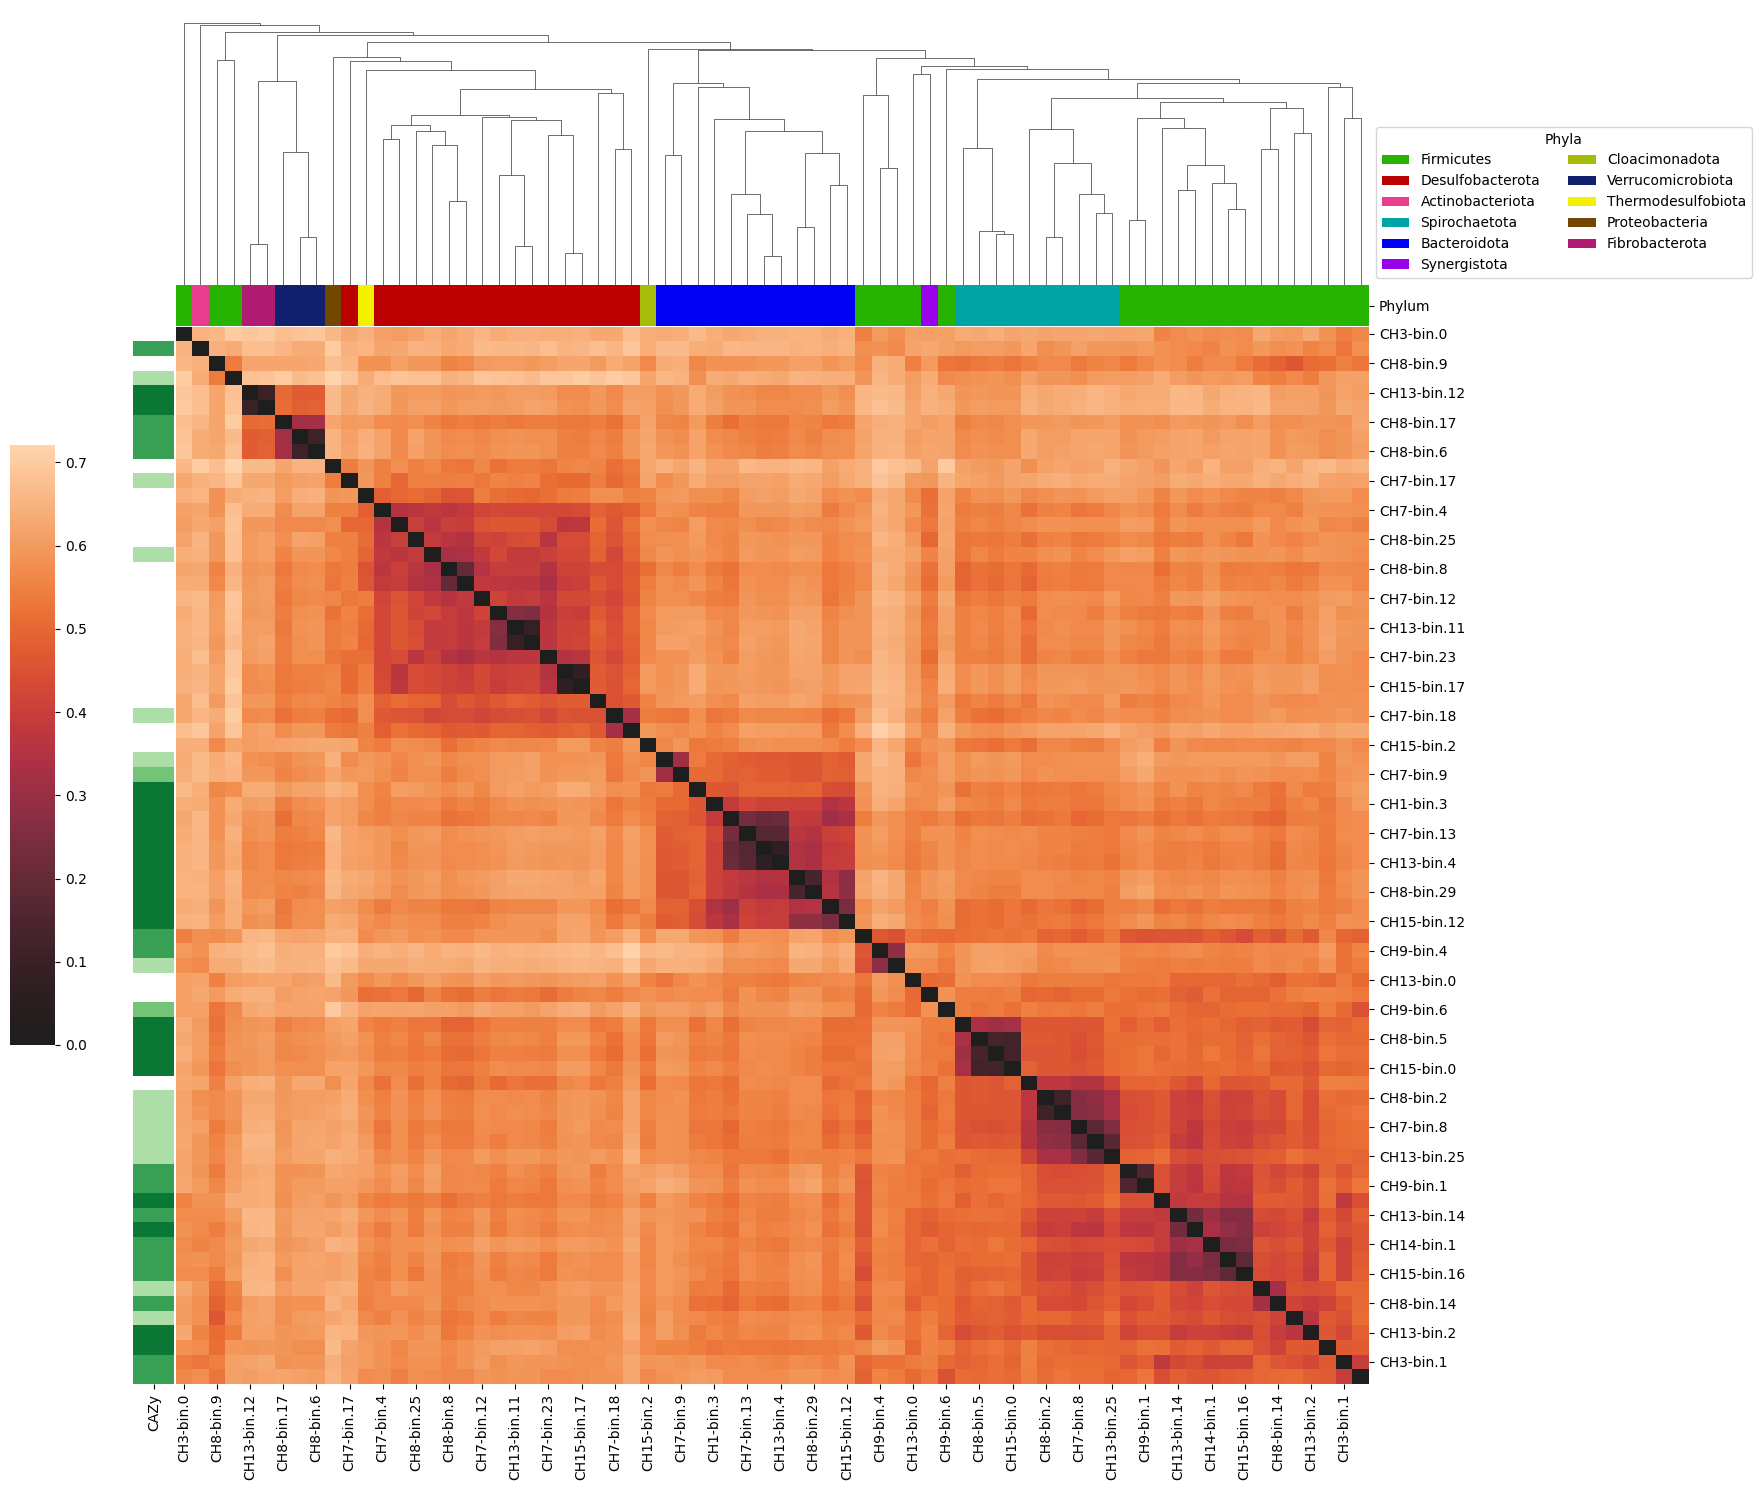

In [5]:
jaccard,linkage = clustermap_func.MAG_MAG_clustermap_data(GEMs_dict,only_exchange_rxns=False)

g = sns.clustermap(data=jaccard,row_linkage=linkage,col_linkage=linkage,center=0,
                   col_colors=phylum_colors,
                   row_colors = cazy_colors,
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(.02, .3, .03, .4),
                   figsize=(15, 15))


for label in unique_phyla:
    g.ax_col_dendrogram.bar(0, 0, color=phyla_lut[label], label=label, linewidth=0)
    
for label in unique_numbers:
    g.ax_row_dendrogram.bar(0, 0, color=cazy_lut[label], label=label, linewidth=0)


g.ax_row_dendrogram.remove()

l1 = g.ax_col_dendrogram.legend(title='Phyla',ncol=2, bbox_to_anchor=[1.0, 0.0], loc='lower left')
plt.show()

### Exchange reactions

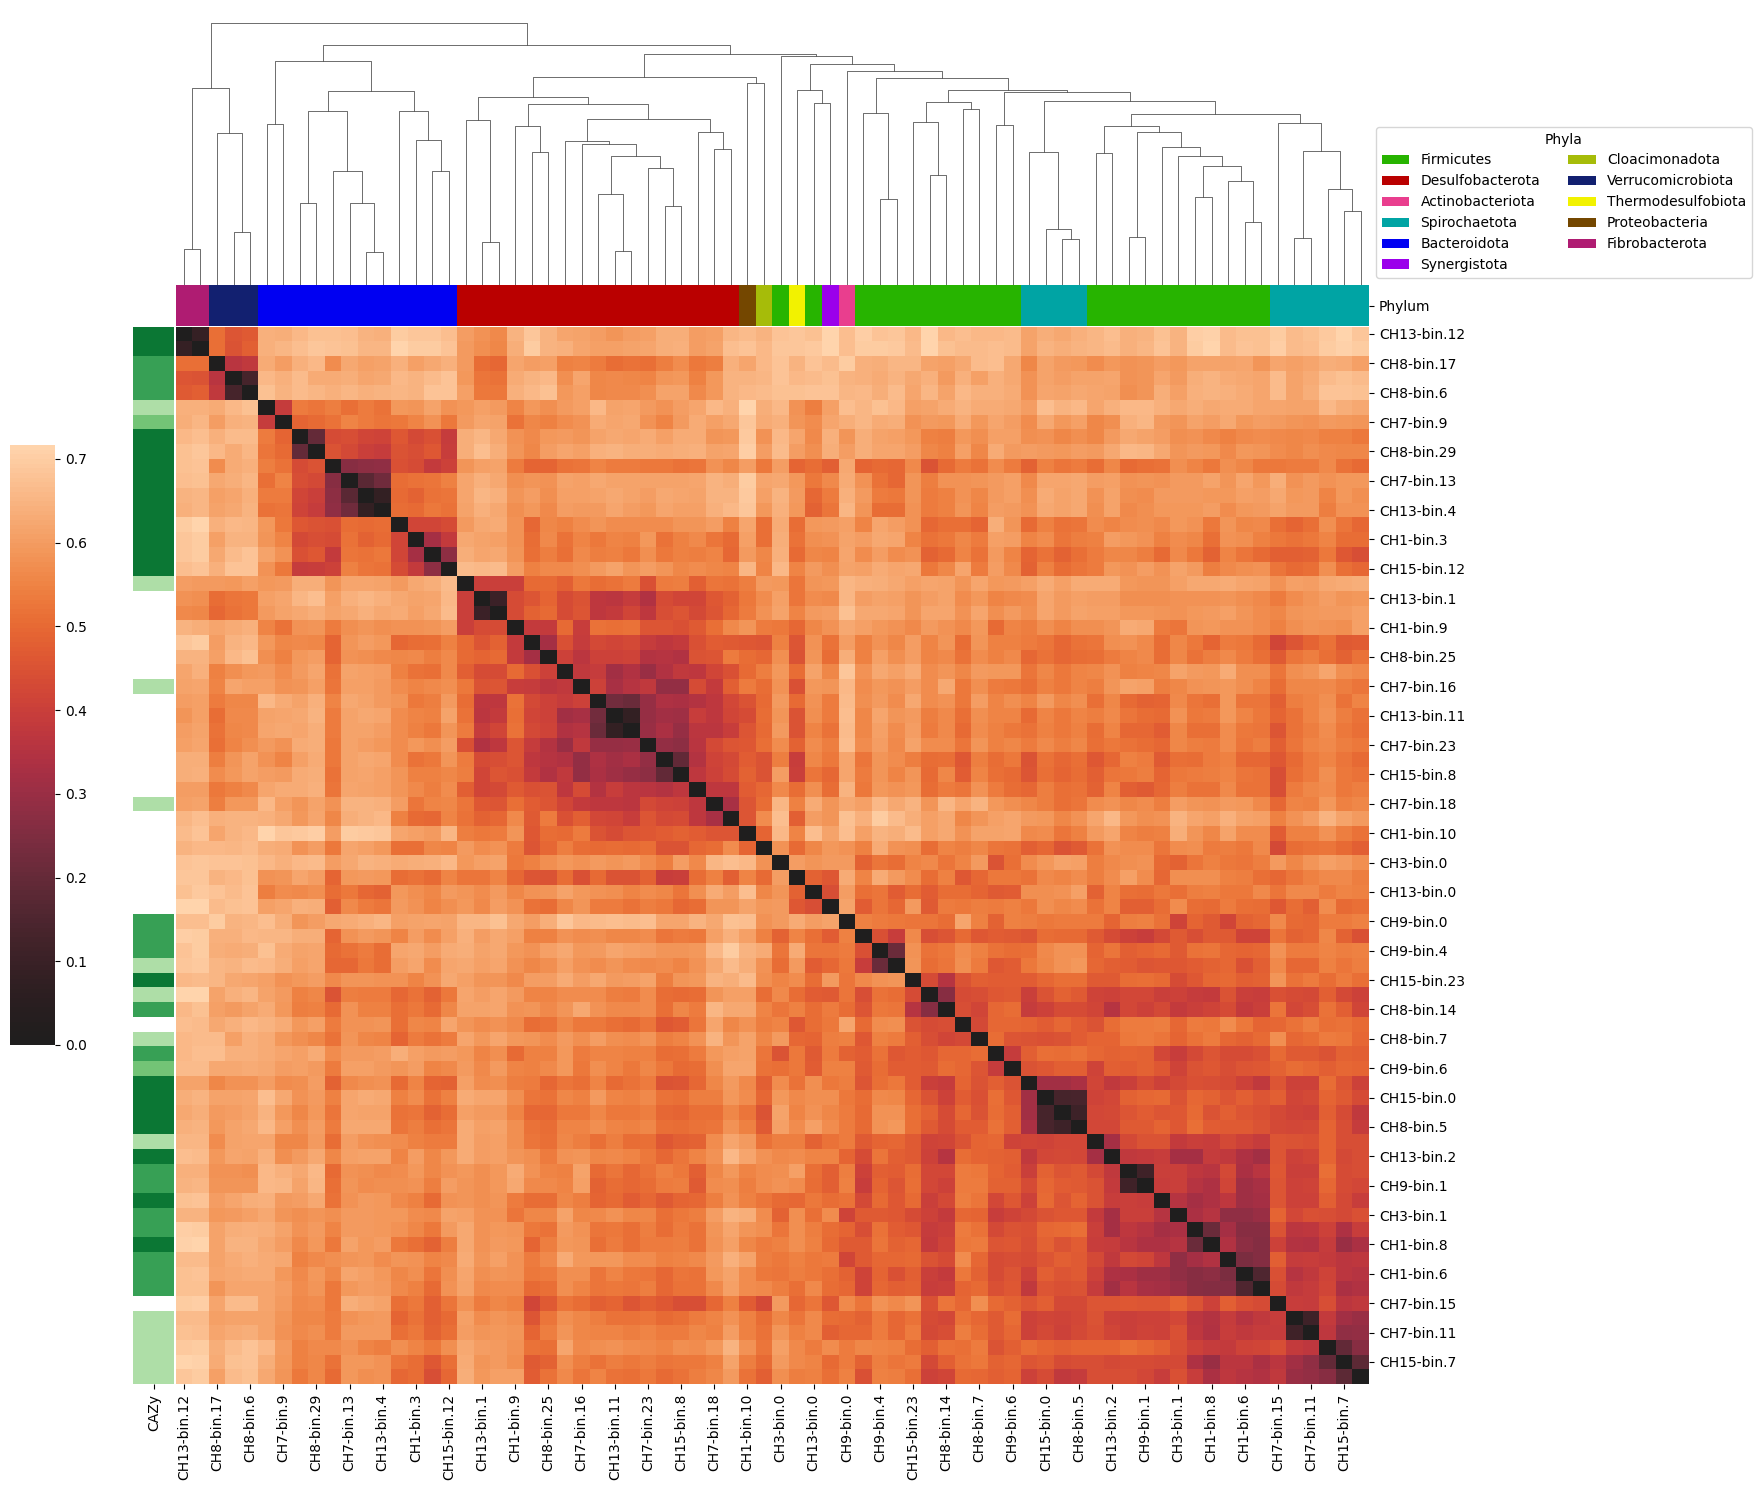

In [6]:
jaccard,linkage = clustermap_func.MAG_MAG_clustermap_data(GEMs_dict,only_exchange_rxns=True)

g = sns.clustermap(data=jaccard,row_linkage=linkage,col_linkage=linkage,center=0,
                   col_colors=phylum_colors,
                   row_colors = cazy_colors,
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(.02, .3, .03, .4),
                   figsize=(15, 15))


for label in unique_phyla:
    g.ax_col_dendrogram.bar(0, 0, color=phyla_lut[label], label=label, linewidth=0)
    
for label in unique_numbers:
    g.ax_row_dendrogram.bar(0, 0, color=cazy_lut[label], label=label, linewidth=0)


g.ax_row_dendrogram.remove()

l1 = g.ax_col_dendrogram.legend(title='Phyla',ncol=2, bbox_to_anchor=[1.0, 0.0], loc='lower left')

plt.show()